In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lighter = sns.color_palette('YlGn')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Распределение танцевальности по жанрам (мне не нравится, потому что ничего особо не показывает)

In [ ]:
dance = data[["playlist_genre", "danceability"]]
dance.head()

,playlist_genre,danceability
0,pop,0.748
1,pop,0.726
2,pop,0.675
3,pop,0.718
4,pop,0.650


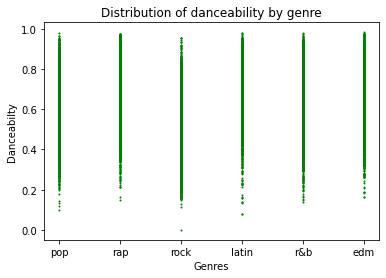

In [ ]:
x = dance["playlist_genre"]
y = dance["danceability"]
plt.scatter(x, y, s=1, color='green')
plt.title("Distribution of danceability by genre")
plt.ylabel("Danceabilty")
plt.xlabel("Genres")
plt.show()

Какие жанры чаще в live-версии


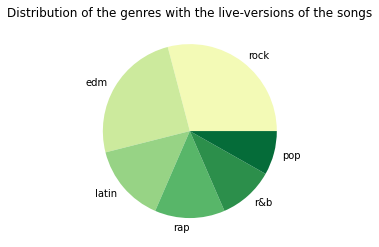

In [ ]:
live = data[data['liveness'] > 0.8]

live['playlist_genre'].value_counts().plot.pie(colors=lighter, ylabel='', title='Distribution of the genres with the live-versions of the songs')
plt.show()

Средняя speechiness по жанрам (как и ожидалось, у рэпа и r&b больше всего)

In [ ]:
pop_data = data[['speechiness', 'playlist_genre']]

genres = ['pop', 'rock', 'r&b', 'edm', 'latin', 'rap']
values = []

for i in genres:
  d1 = pop_data[pop_data['playlist_genre'] == i]
  mean = d1['speechiness'].mean()
  values.append(mean)

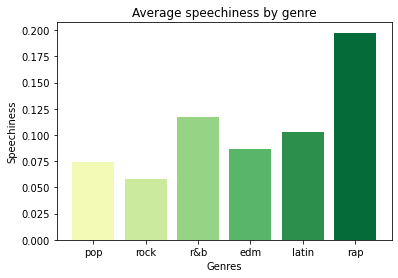

In [ ]:
x = genres
y = values
fig, ax = plt.subplots()
ax.bar(x, y, color=lighter)
ax.set_title('Average speechiness by genre')
ax.set_xlabel('Genres')
ax.set_ylabel('Speechiness')

plt.show()

Энергичность -- танцевальность (кажется, гипотеза про то, что самые энерргичные треки должны быть танцевальными, не подтверждается)

In [ ]:
en_dance = data[["track_name", "energy", "danceability"]]
en_dance.head()

,track_name,energy,danceability
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.916,0.748
1,Memories - Dillon Francis Remix,0.815,0.726
2,All the Time - Don Diablo Remix,0.931,0.675
3,Call You Mine - Keanu Silva Remix,0.930,0.718
4,Someone You Loved - Future Humans Remix,0.833,0.650


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


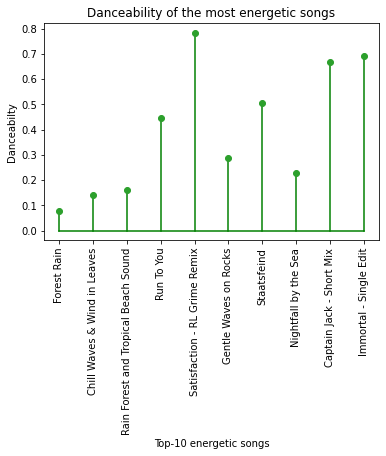

In [68]:
d = en_dance.sort_values("energy",  ascending=False).head(10)

markers, stemlines, baseline = plt.stem(d['track_name'], d['danceability'], markerfmt='C2o', linefmt='green')
plt.setp(baseline, 'color', 'green')
plt.xticks(rotation=90)
plt.title("Danceability of the most energetic songs")
plt.ylabel("Danceabilty")
plt.xlabel("Top-10 energetic songs")
plt.show()

Streamgraph года и выпущенные песни